# Housing Prices Dataset

In [262]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import importlib
import modules.analysis

importlib.reload(modules.analysis)

from modules.analysis import features, single_variable_EDA, pairwise_EDA, relationship
from utils.helpers import load_data

In [263]:
# import dataset 
df = load_data("data/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Mapping categorical into numerical features:

In [264]:
mainroad_mapping = {
    "yes": 1,
    "no": 0
}
df['mainroad'] = df['mainroad'].map(mainroad_mapping)

In [265]:
guestroom_mapping = {
    "yes": 1,
    "no": 0
}
df['guestroom'] = df['guestroom'].map(guestroom_mapping)

In [266]:
basement_mapping = {
    "yes": 1,
    "no": 0
}
df['basement'] = df['basement'].map(basement_mapping)

In [267]:
hotwaterheating_mapping = {
    "yes": 1,
    "no": 0
}
df['hotwaterheating'] = df['hotwaterheating'].map(hotwaterheating_mapping)

In [268]:
airconditioning_mapping = {
    "yes": 1,
    "no": 0
}  
df['airconditioning'] = df['airconditioning'].map(airconditioning_mapping)

In [269]:
prefarea_mapping = {
    "yes": 1,
    "no": 0
}
df['prefarea'] = df['prefarea'].map(prefarea_mapping)

In [270]:
furnishingstatus_mapping = {
    "furnished": 2,
    "semi-furnished": 1,
    "unfurnished": 0
}
df['furnishingstatus'] = df['furnishingstatus'].map(furnishingstatus_mapping)

## Features: 

* price = target

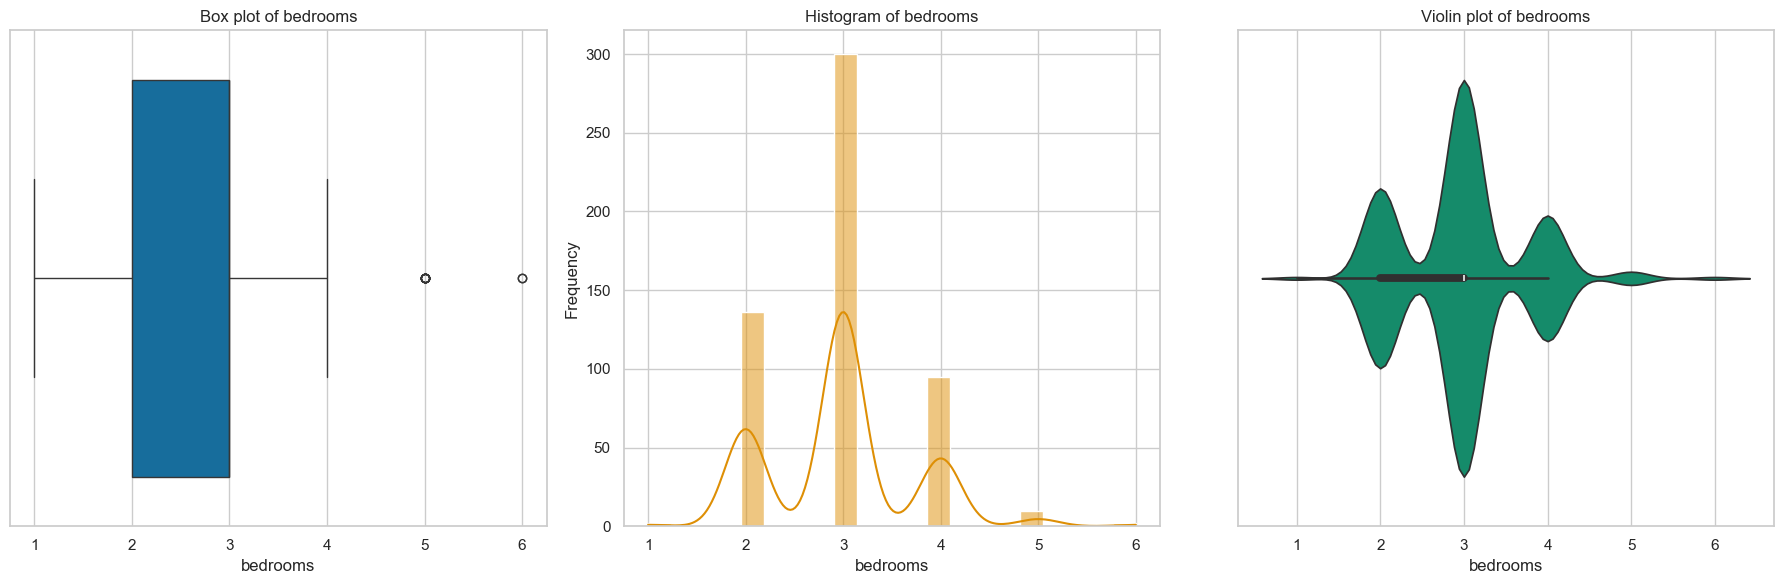

In [271]:
single_variable_EDA(df, "bedrooms", "numerical")

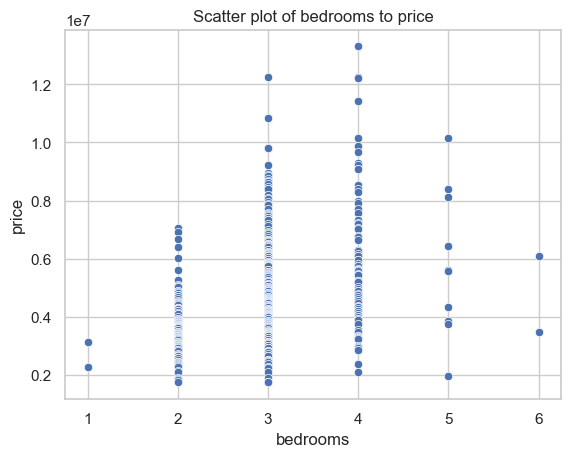

In [272]:
pairwise_EDA(df, "bedrooms", "price", "numtonum")
# can change to histogram 

In [273]:
features(df, "bedrooms", "mean")

The mean of bedrooms is 2.97



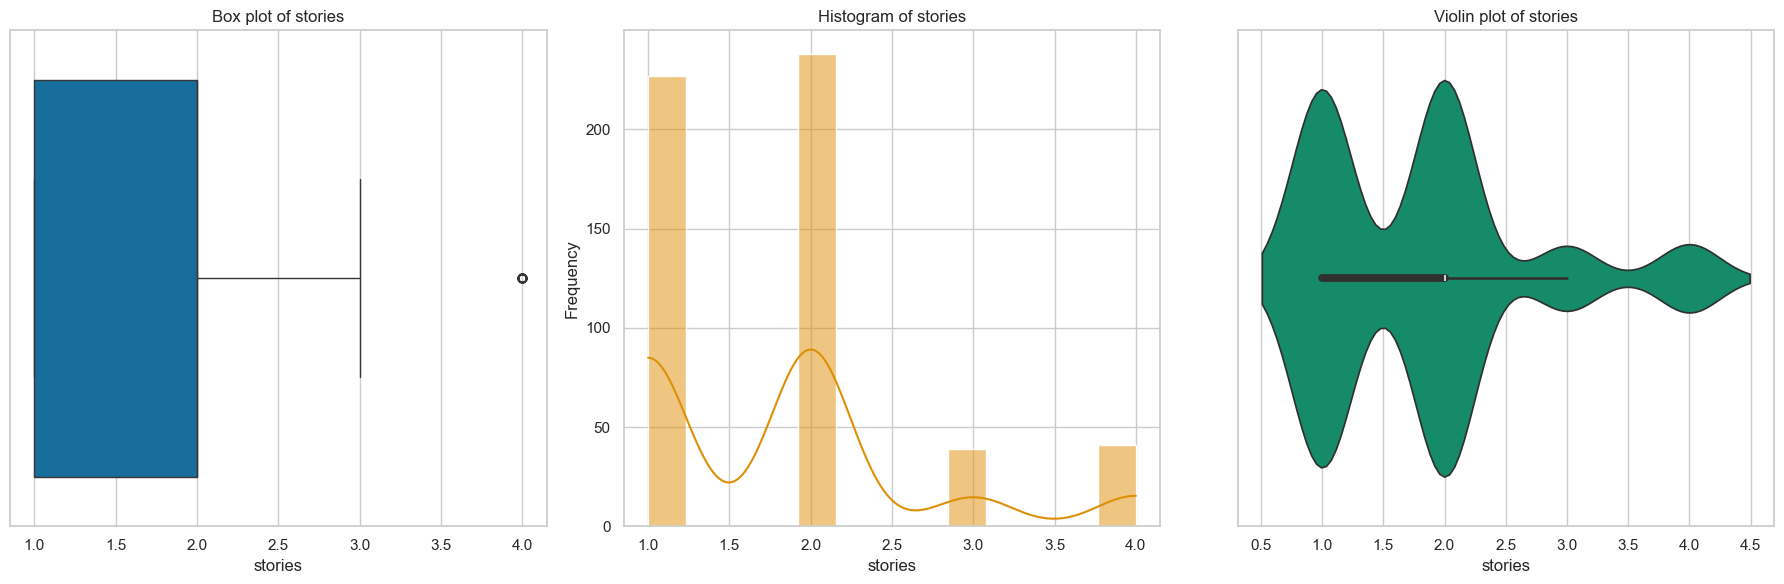

In [274]:
single_variable_EDA(df, "stories", "numerical")

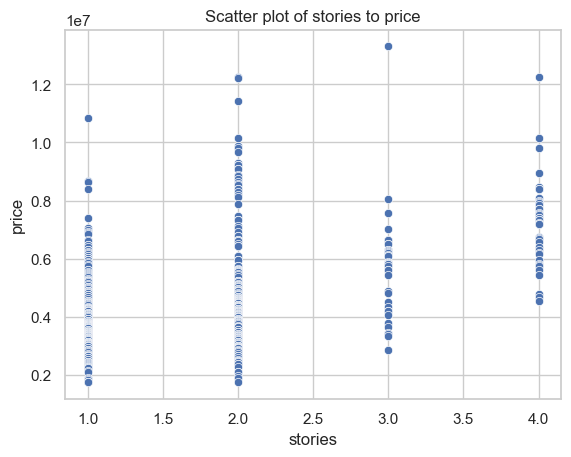

In [275]:
pairwise_EDA(df, "stories", "price", "numtonum")

In [276]:
features(df, "stories", "std")

The standard deviation of stories is 0.87



/Users/bopri/projects/modules/analysis.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, ax=ax[0], palette= "colorblind")
/Users/bopri/projects/modules/analysis.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, ax=ax[1], palette=color_palette)
/Users/bopri/projects/modules/analysis.py:23: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column_name, ax=ax[1], palette=color_palette)


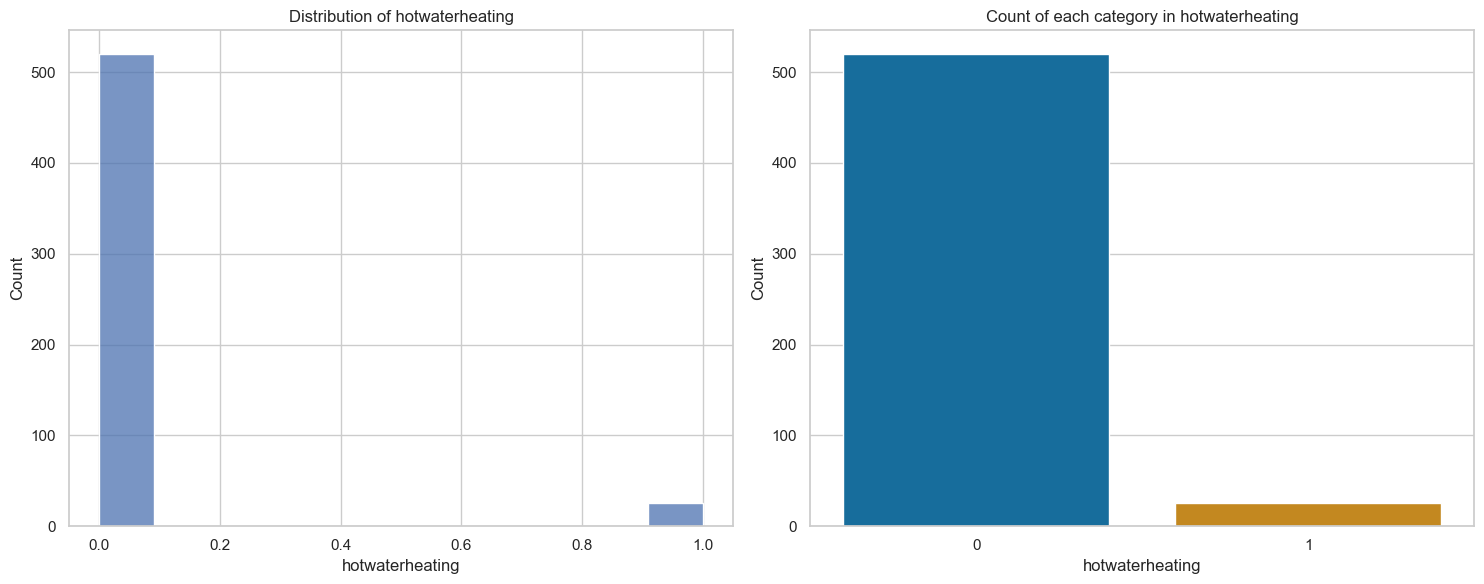

In [277]:
single_variable_EDA(df, "hotwaterheating", "categorical")

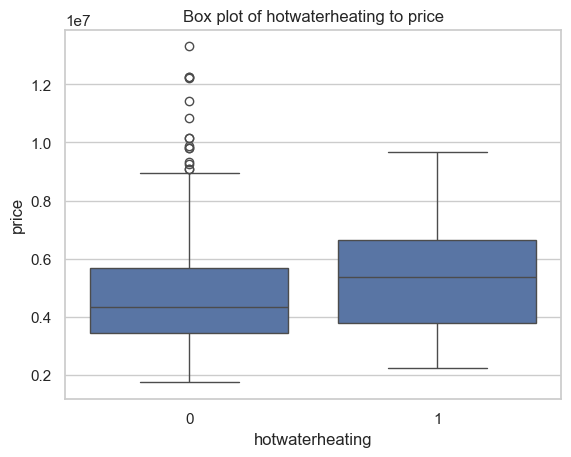

In [278]:
pairwise_EDA(df, "hotwaterheating", "price", "cattonum")

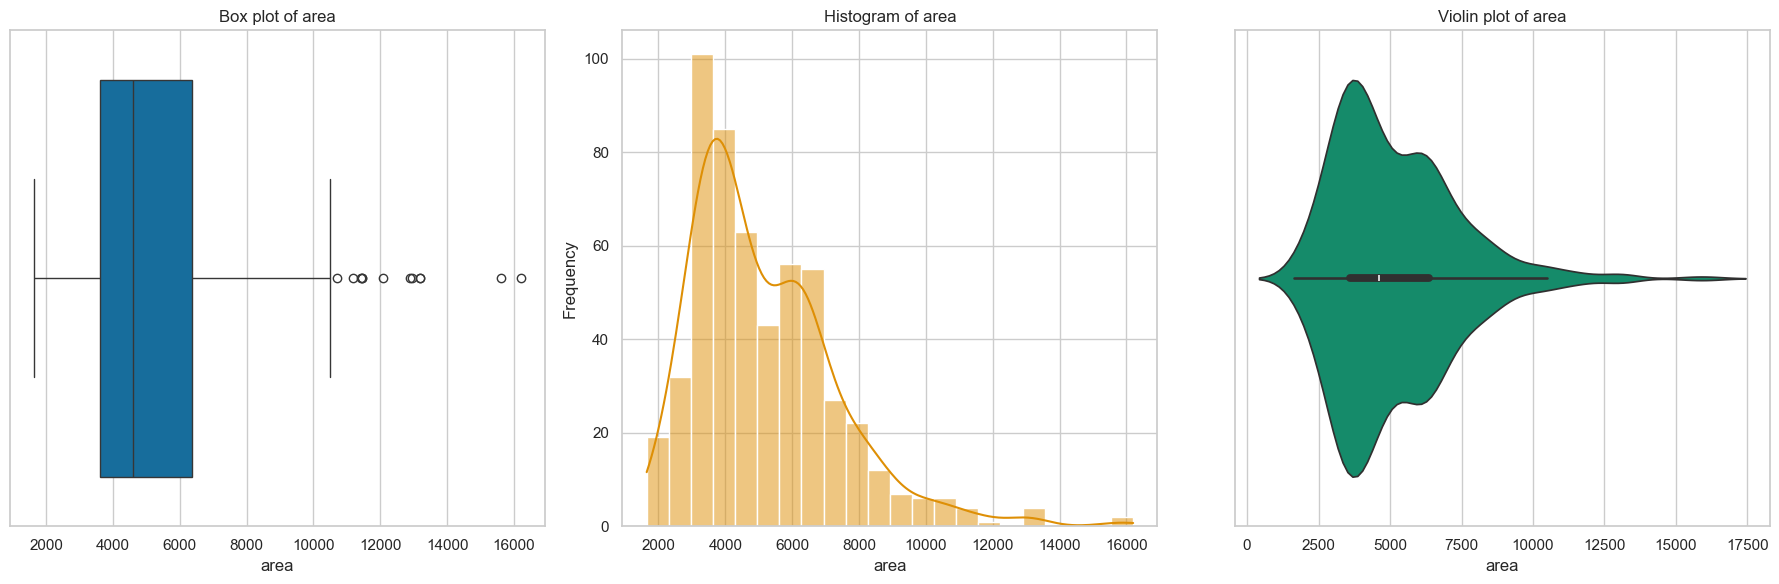

In [279]:
single_variable_EDA(df, "area", "numerical")

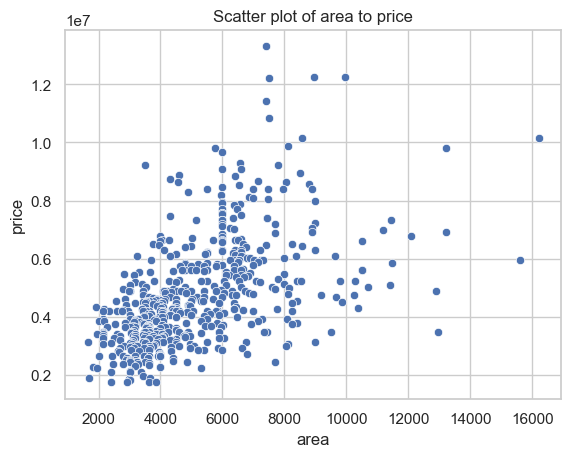

In [280]:
pairwise_EDA(df, "area", "price", "numtonum")
# can add lowess line

# Feature Engineering

In [281]:
# average room size = area / (bedrooms + bathrooms)
df["avg_room_size"] = df["area"] / (df["bedrooms"] + df["bathrooms"])

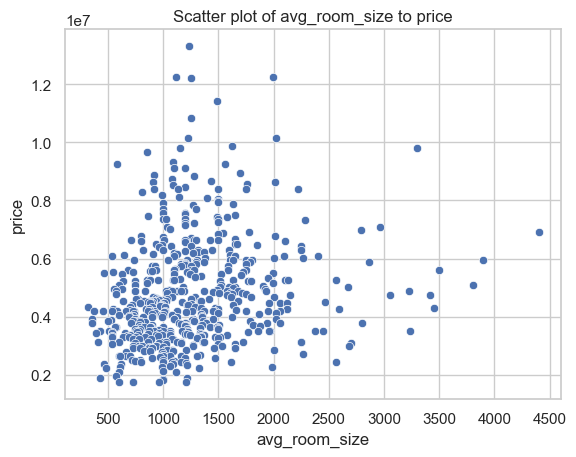

In [282]:
pairwise_EDA(df, "avg_room_size", "price", "numtonum")

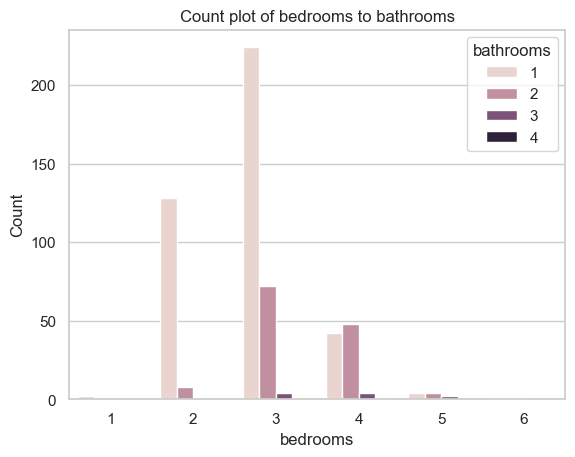

In [283]:
# bedrooms and bathrooms are highly correlated
relationship(df, "bedrooms", "bathrooms", "cattocat")

In [300]:
np.corrcoef(df["bedrooms"], df["bathrooms"])

array([[1.        , 0.37393024],
       [0.37393024, 1.        ]])

In [284]:
# added bedroom and bathroom feature
df["bed_bath"] = df["bedrooms"] + df["bathrooms"]

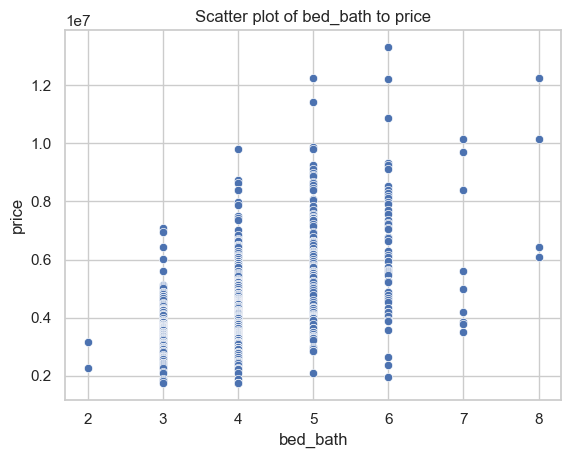

In [285]:
pairwise_EDA(df, "bed_bath", "price", "numtonum")

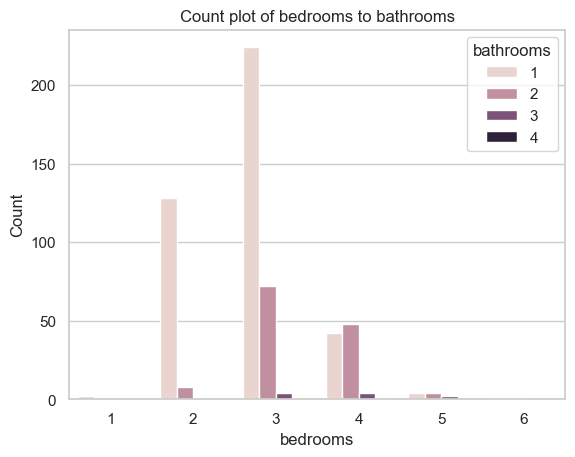

In [286]:
#relationship of bedroom to bathroom
relationship(df, "bedrooms", "bathrooms", "cattocat")

In [287]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

In [288]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,avg_room_size,bed_bath,total_rooms
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,1236.666667,6,6
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,1120.000000,8,8
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,1992.000000,5,5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,1250.000000,6,6
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,1484.000000,5,5


In [289]:
##drop null columns
df.dropna(inplace=True)


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    int64  
 13  avg_room_size     545 non-null    float64
 14  bed_bath          545 non-null    int64  
 15  total_rooms       545 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 68.3 

# Mean Infilling

In [291]:
#fill in the missing na columns with different values 
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,avg_room_size,bed_bath,total_rooms
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,1236.666667,6,6
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,1120.000000,8,8
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,1992.000000,5,5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,1250.000000,6,6
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,1484.000000,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1000.000000,3,3
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,600.000000,4,4
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1206.666667,3,3
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2,727.500000,4,4


In [292]:
%pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [293]:
import statsmodels.api as sm

In [294]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,avg_room_size,bed_bath,total_rooms
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,1236.666667,6,6
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,1120.000000,8,8
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,1992.000000,5,5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,1250.000000,6,6
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,1484.000000,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1000.000000,3,3
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,600.000000,4,4
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1206.666667,3,3
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2,727.500000,4,4


In [295]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("price", axis=1), df["price"], test_size=0.2, random_state=42)

### Training the model

In [296]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
#done before prediction, but also before you training your model
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [297]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

In [298]:
model.summary()
# R^2 explains the variance of the model. Model explains 68.5% of the variance in the data. (explained variance)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     71.94
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           2.69e-98
Time:                        23:31:42   Log-Likelihood:                -6633.0
No. Observations:                 436   AIC:                         1.329e+04
Df Residuals:                     422   BIC:                         1.335e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.707e+06   4.77e+04     98.743      0.000    4.61e+06     4.8e+06
x1          9.462e+05      2e+05      4.727      0.000    5.53e+05    1.34e+06
x2         -1.759e+05   4.95e+04     -3.556      0.000   -2.73e+05   -7.87e+04
x3          3.774e+05   5.39e+04      6.996      0.000    2.71e+05    4.83e+05
x4          3.282e+05   5.94e+04      5.527      0.000    2.11e+05    4.45e+05
x5          1.262e+05   5.19e+04      2.432      0.015    2.42e+04    2.28e+05
x6          7.752e+04   5.39e+04      1.439      0.151   -2.84e+04    1.83e+05
x7          1.896e+05    5.6e+04      3.383      0.001    7.94e+04       3e+05
x8          1.558e+05   4.86e+04      3.205      0.001    6.03e+04    2.51e+05
x9          3.654e+05   5.36e+04      6.822      0.000     2.6e+05    4.71e+05
x10         1.929e+05   5.25e+04      3.674      0.000    8.97e+04    2.96e+05
x11         2.612e+05    5.1e+04      5.119      0.000    1.61e+05    3.62e+05
x12         1.645e+05   5.03e+04      3.273      0.001    6.57e+04    2.63e+05
x13        -4.548e+05   2.05e+05     -2.217      0.027   -8.58e+05   -5.15e+04
x14         4.709e+04   3.49e+04      1.348      0.178   -2.16e+04    1.16e+05
x15         4.709e+04   3.49e+04      1.348      0.178   -2.16e+04    1.16e+05
==============================================================================
Omnibus:                       70.767   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.886
Skew:                           0.799   Prob(JB):                     1.94e-40
Kurtosis:                       5.741   Cond. No.                     2.81e+31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.22e-60. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [299]:
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

1320858.1306396897


In [301]:
#X_test = sm.add_constant(X_test)
#y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)
y_pred = model.predict(X_train)
mean_squared_error(y_train, y_pred)
print(np.sqrt(mean_squared_error(y_train, y_pred)))
#print(np.sqrt(mean_squared_error(y_test, y_pred)))

979153.2591236193
